# Results Exploration

## Setup

In [22]:
from pandas import read_csv
import matplotlib.pyplot as plt
from os import path as os_path
import scipy.stats as stats

from Tester import RESULTS_FULL_PATH, AFTER_WINDOW_TEST_SIZES

SIGNIFICANCE_LEVEL = 0.05

In [28]:
file_name = "full results.csv"

dtypes = {
    "after window size": "float64", 
    "drift description": "string",
    "drifted features types": "string",
    "tree size": "int64",
    "after accuracy decrease": "float64",
    "after retrain accuracy": "float64",
    "after retrain accuracy increase": "float64",
    "before after retrain accuracy": "float64",
    "before after retrain accuracy increase": "float64",
    "BARINEL_Features faulty nodes indicies": "string",
    "BARINEL_Features faulty features": "string",
    "BARINEL_Features wasted effort": "float64",
    "BARINEL_Features fix accuracy": "float64",
    "BARINEL_Features fix accuracy increase": "float64",
    "STAT_SFLDT faulty nodes indicies": "string",
    "STAT_SFLDT faulty features": "string",
    "STAT_SFLDT wasted effort": "float64",
    "STAT_SFLDT fix accuracy": "float64",
    "STAT_SFLDT fix accuracy increase": "float64",
}
results_df = read_csv(os_path.join(RESULTS_FULL_PATH, file_name), dtype=dtypes)

accuracy_increase_columns = [column for column in results_df.columns if column.endswith("accuracy increase")]
wasted_efforts_columns = [column for column in results_df.columns if column.endswith("wasted effort")]

print(f"Datasets count: {len(results_df['drift description'].apply(lambda x: x.split('__')[0]).unique())}")

results_df.head()

Datasets count: 33


after window size                       drift description  \
0                0.1  schlvote__NumericFeature[budget;-2std]   
1                0.2  schlvote__NumericFeature[budget;-2std]   
2                0.3  schlvote__NumericFeature[budget;-2std]   
3                0.4  schlvote__NumericFeature[budget;-2std]   
4                0.5  schlvote__NumericFeature[budget;-2std]   

  drifted features types  tree size  after accuracy decrease  \
0                numeric          3                28.571429   
1                numeric          3                28.571429   
2                numeric          3                28.571429   
3                numeric          3                28.571429   
4                numeric          3                28.571429   

   after retrain accuracy  after retrain accuracy increase  \
0               28.571429                              0.0   
1               28.571429                              0.0   
2               28.571429                              0.0   
3               28.571429                              0.0   
4               28.571429                              0.0   

   before after retrain accuracy  before after retrain accuracy increase  \
0                      28.571429                                     0.0   
1                      28.571429                                     0.0   
2                      28.571429                                     0.0   
3                      28.571429                                     0.0   
4                      28.571429                                     0.0   

  BARINEL_Features faulty nodes indicies BARINEL_Features faulty features  \
0                                      0                           budget   
1                                      0                           budget   
2                                      0                           budget   
3                                      0                           budget   
4                                      0                           budget   

   BARINEL_Features wasted effort  BARINEL_Features fix accuracy  \
0                             0.0                      28.571429   
1                             0.0                      28.571429   
2                             0.0                      28.571429   
3                             0.0                      28.571429   
4                             0.0                      28.571429   

   BARINEL_Features fix accuracy increase STAT_SFLDT faulty nodes indicies  \
0                                     0.0                                1   
1                                     0.0                                1   
2                                     0.0                                1   
3                                     0.0                                1   
4                                     0.0                                1   

  STAT_SFLDT faulty features  STAT_SFLDT wasted effort  \
0                     target                       0.0   
1                     target                       0.0   
2                     target                       0.0   
3                     target                       0.0   
4                     target                       0.0   

   STAT_SFLDT fix accuracy  STAT_SFLDT fix accuracy increase  
0                85.714286                         57.142857  
1                85.714286                         57.142857  
2                85.714286                         57.142857  
3                85.714286                         57.142857  
4                85.714286                         57.142857

## Overall Performance

In [29]:
# filter results with after window size 1
relevant_columns = ["drifted features types"] + accuracy_increase_columns + wasted_efforts_columns
results_df_after_size_1 = results_df[results_df["after window size"] == 1][relevant_columns]

numeric_results_filter = lambda features_types: all([feature_type == "numeric" for feature_type in features_types.split(", ")])
categorical_results_filter = lambda features_types: all([feature_type == "binary" for feature_type in features_types.split(", ")])

get_all_features_types = lambda features_types: "numeric" if numeric_results_filter(features_types) else "binary" if categorical_results_filter(features_types) else "mixed"

results_df_after_size_1["drifted features types"] = results_df_after_size_1["drifted features types"].apply(get_all_features_types)
# group by features types and get the mean of each group
results_df_after_size_1_grouped = results_df_after_size_1.groupby("drifted features types").mean().reset_index()
# Transpose the table and make the first row the header
results_df_after_size_1_grouped = results_df_after_size_1_grouped.T
results_df_after_size_1_grouped.columns = results_df_after_size_1_grouped.iloc[0]
results_df_after_size_1_grouped = results_df_after_size_1_grouped[1:]
results_df_after_size_1_grouped

drifted features types                      mixed    numeric
after retrain accuracy increase          17.37828  21.617052
before after retrain accuracy increase  21.882455  25.904333
BARINEL_Features fix accuracy increase    8.91889  12.886815
STAT_SFLDT fix accuracy increase         4.637009    9.31537
BARINEL_Features wasted effort           0.052049   0.116657
STAT_SFLDT wasted effort                  0.64216   1.101223

## Effect of Test Size

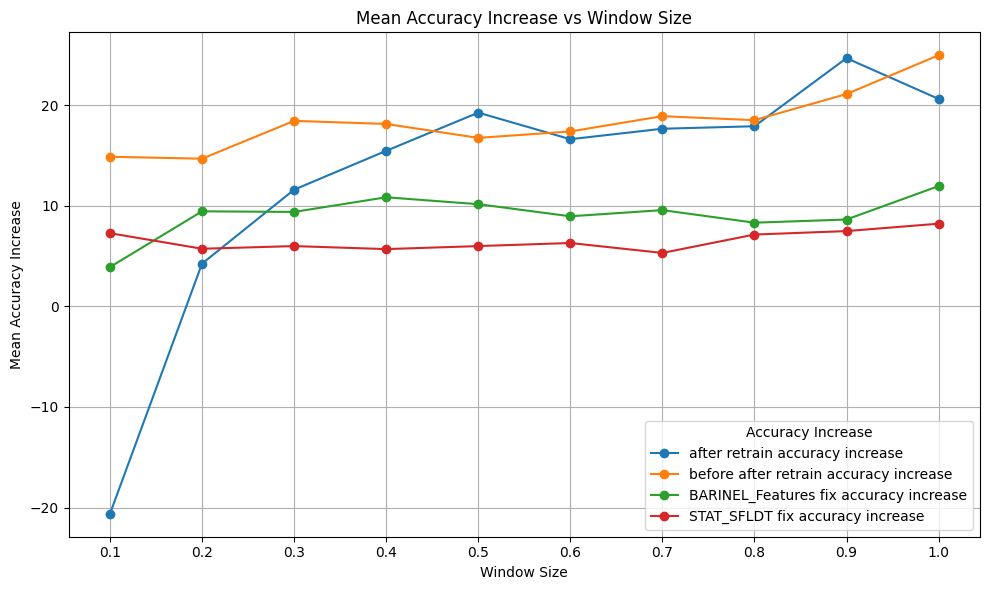

after window size  after retrain accuracy increase  \
0                0.1                       -20.622078   
1                0.2                         4.245967   
2                0.3                        11.595309   
3                0.4                        15.456151   
4                0.5                        19.253060   
5                0.6                        16.612420   
6                0.7                        17.653286   
7                0.8                        17.900944   
8                0.9                        24.668163   
9                1.0                        20.618739   

   before after retrain accuracy increase  \
0                               14.867043   
1                               14.676777   
2                               18.436047   
3                               18.129253   
4                               16.744718   
5                               17.382101   
6                               18.903122   
7                               18.505131   
8                               21.103073   
9                               24.957102   

   BARINEL_Features fix accuracy increase  STAT_SFLDT fix accuracy increase  
0                                3.904801                          7.271026  
1                                9.443463                          5.723413  
2                                9.384331                          5.989076  
3                               10.839996                          5.689337  
4                               10.153457                          5.988761  
5                                8.950771                          6.295009  
6                                9.564096                          5.306877  
7                                8.314516                          7.135377  
8                                8.628516                          7.480352  
9                               11.952292                          8.213525

In [25]:
relevant_columns = ["after window size"] + accuracy_increase_columns
grouped_results = results_df[relevant_columns].groupby("after window size").mean().reset_index().sort_values(by="after window size")

# Plotting the results
plt.figure(figsize=(10, 6))
for column in relevant_columns[1: ]:
	plt.plot(grouped_results["after window size"], grouped_results[column], marker='o', label=column)
plt.title("Mean Accuracy Increase vs Window Size")
plt.xlabel("Window Size")
plt.ylabel("Mean Accuracy Increase")
plt.xticks(grouped_results["after window size"])
plt.grid(True)
plt.legend(relevant_columns[1: ], title="Accuracy Increase")
plt.tight_layout()
plt.show()
grouped_results

## Significance Difference Compared to STAT_SFLDT

In [26]:
old_model = "STAT_SFLDT"
new_model = "BARINEL_Features"
column_suffix = " fix accuracy increase"
for after_size in AFTER_WINDOW_TEST_SIZES:
    after_size_results_df = results_df[results_df["after window size"] == after_size]

    # Get the relevant columns for the old and new models
    old_model_column = f"{old_model}{column_suffix}"
    new_model_column = f"{new_model}{column_suffix}"

    # Perform the t-test
    ttest = stats.ttest_rel(after_size_results_df[old_model_column], after_size_results_df[new_model_column], alternative='less')

    if ttest.pvalue < SIGNIFICANCE_LEVEL:
        print(f"After window size {float(after_size)}: {new_model} is significantly better {old_model}.")
    else:
        print(f"After window size {float(after_size)}: No significant difference between the two models.")

After window size 0.1: No significant difference between the two models.
After window size 0.2: BARINEL_Features is significantly better STAT_SFLDT.
After window size 0.3: BARINEL_Features is significantly better STAT_SFLDT.
After window size 0.4: BARINEL_Features is significantly better STAT_SFLDT.
After window size 0.5: BARINEL_Features is significantly better STAT_SFLDT.
After window size 0.6: BARINEL_Features is significantly better STAT_SFLDT.
After window size 0.7: BARINEL_Features is significantly better STAT_SFLDT.
After window size 0.8: BARINEL_Features is significantly better STAT_SFLDT.
After window size 0.9: BARINEL_Features is significantly better STAT_SFLDT.
After window size 1.0: BARINEL_Features is significantly better STAT_SFLDT.
